### LIGO-P1800061: Short example code for reading in and plotting posterior samples

The data is at the URL https://dcc.ligo.org/LIGO-P1800061/public:

In [3]:
public_dcc_url='https://dcc.ligo.org/public/0150/P1800061/009/'

!curl -k -O {public_dcc_url}"GW170817_PSDs.dat"
!curl -k -O {public_dcc_url}"high_spin_PhenomPNRT_posterior_samples.dat.gz"
!curl -k -O {public_dcc_url}"low_spin_PhenomPNRT_posterior_samples.dat.gz"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.8M  100 13.8M    0     0  7299k      0  0:00:01  0:00:01 --:--:-- 7310k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  971k  100  971k    0     0  4444k      0 --:--:-- --:--:-- --:--:-- 4538k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  423k  100  423k    0     0      0      0 --:--:-- --:--:-- --:--:--     02811k      0 --:--:-- --:--:-- --:--:-- 2878k


In order to read-in the data, this notebook uses pandas (http://pandas.pydata.org/). Other packages such as numpy (http://www.numpy.org/) will work as well.

In [17]:
import pandas as pd

ImportError: No module named pandas

##### PSDs

First a 1D plot, the PSD:

In [3]:
# reading the GW170817_PSDs.dat file
PSD=pd.read_table('GW170817_PSDs.dat',index_col=0)

In [4]:
# plotting
PSD.plot(loglog=True);

##### Posterior samples

The IMRPhenomPNRT samples are in the `high_spin_PhenomPNRT_posterior_samples.dat.gz` and `low_spin_PhenomPNRT_posterior_samples.dat.gz` files, for the "high spin" and "low spin" priors, respectively. (See the paper for details).

In [5]:
# reading the high_spin_PhenomPNRT_posterior_samples.dat.gz file
high_spin=pd.read_table('high_spin_PhenomPNRT_posterior_samples.dat.gz',delim_whitespace=True)

In [6]:
# checking the content:
high_spin.head()

,costheta_jn,luminosity_distance_Mpc,m1_detector_frame_Msun,m2_detector_frame_Msun,lambda1,lambda2,spin1,spin2,costilt1,costilt2
0,-0.993596,47.728797,1.911550,1.010550,365.345507,99.242133,0.084102,0.129488,0.683080,0.767114
1,-0.954812,42.051751,2.339391,0.850591,19.952612,3270.621882,0.761975,0.325375,0.266637,-0.396995
2,-0.986323,44.378266,2.098759,0.931645,23.518184,907.312802,0.649165,0.004049,0.180002,-0.152065
3,-0.454467,28.789020,1.700900,1.122544,312.021073,740.124071,0.146863,0.295022,0.599691,-0.194045
4,-0.948537,43.966578,1.567364,1.211268,327.764681,779.762955,0.071833,0.148521,0.701276,-0.336068


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f849ec12950>]], dtype=object)

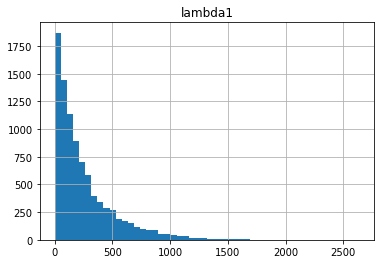

In [7]:
# 1D histogram of the "lambda1" parameter
high_spin.hist(column='lambda1',bins=50)

In [8]:
# reading the low_spin_PhenomPNRT_posterior_samples.dat.gz file
low_spin=pd.read_table('low_spin_PhenomPNRT_posterior_samples.dat.gz',delim_whitespace=True)

Optionally to make plotting simpler, we can concatenate the "high_spin" and "low_spin" posterior data:

In [9]:
high_spin['prior']="high_spin"
low_spin['prior']="low_spin"
data=pd.concat([high_spin, low_spin])

This notebook uses here seaborn (https://seaborn.pydata.org/, based on matplotlib) for plotting. Other packages such as directly matplotlib (https://matplotlib.org/) will work as well.


In [10]:
import seaborn as sns

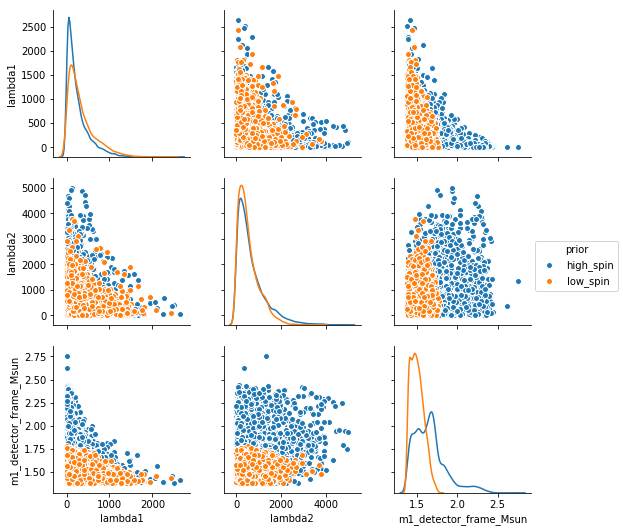

In [11]:
# Plotting several parameters' pair-wise relationships
sns.pairplot(data,vars=["lambda1","lambda2","m1_detector_frame_Msun"],
             hue='prior',diag_kind="kde");